## I-94 Interstate Highway

#####  goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

### Getting to know the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [10]:
highway = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [11]:
highway.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
#no null values exist

### Analyzing traffic volume

In [12]:
highway['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

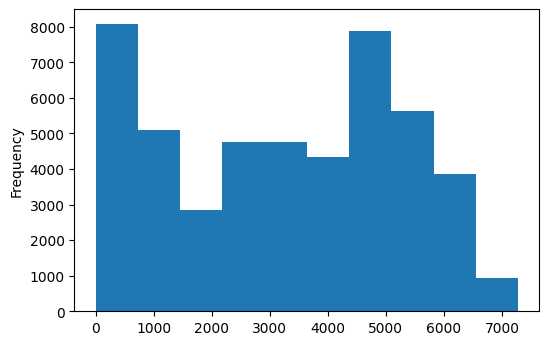

In [13]:
highway['traffic_volume'].plot.hist()

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

### Traffic: day time vs night time

In [15]:
#Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
#Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [16]:
highway['date_time'] = pd.to_datetime(highway['date_time'])

In [18]:
highway['date_time'].dt.hour[:30]

0      9
1     10
2     11
3     12
4     13
5     14
6     15
7     16
8     17
9     18
10    19
11    20
12    21
13    22
14    23
15     0
16     1
17     2
18     3
19     4
20     5
21     6
22     8
23     9
24    12
25    13
26    14
27    15
28    16
29    18
Name: date_time, dtype: int64

In [19]:
day = highway[(highway['date_time'].dt.hour >= 7) & (highway['date_time'].dt.hour < 19)]
night = highway[(highway['date_time'].dt.hour < 7) | (highway['date_time'].dt.hour >= 19)]

In [20]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [21]:
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [22]:
24327+23877
#adds up to total columns in data

48204

But why is the amount of day and nigh time data not the same if both cover 12 hours each of a day??? 
- possibly due to missing data

### further comparison on day and night time data

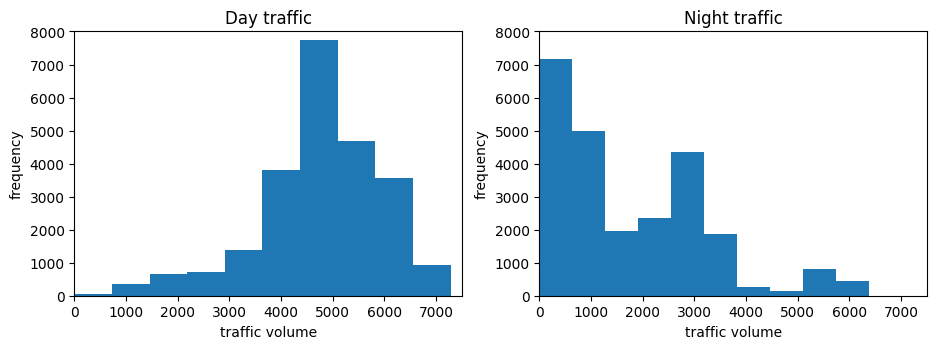

In [29]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Day traffic')
plt.xlabel('traffic volume')
plt.ylabel('frequency')
plt.xlim(0,7500)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Night traffic')
plt.xlabel('traffic volume')
plt.ylabel('frequency')
plt.xlim(0,7500)
plt.ylim(0,8000)

plt.show()

traffic at daytime seems to be negatively skewed meaning that there's large volumes of traffic in comparison to night time traffic which seems to be quite positively skewed showing mode of traffic volume at the lower end of the histogram 

In [30]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [31]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

this observation is backed by the comparison of the the data times i.e. we can see that 75% of the time, traffic has a volume of 4353 in daytime which is more than 4 times what 75% of traffic volume is like in nighttime

Moving on, i would like to focus my analyis on teh day time data cause we are analysing indicators of heavy traffic

### analyse data by month

In [32]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-32-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

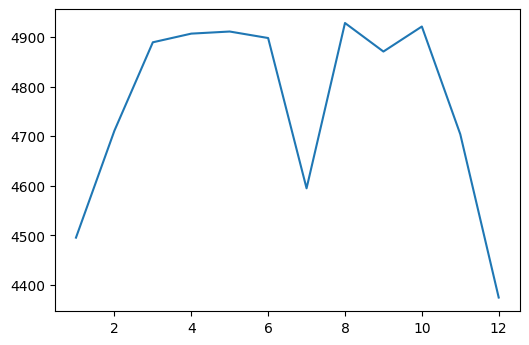

In [34]:
plt.plot(by_month['traffic_volume'])

- less traffic during winter(cold months) compared to other months
- dip in traffic volume in July(why?)

<ipython-input-35-cba92ca5a37a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



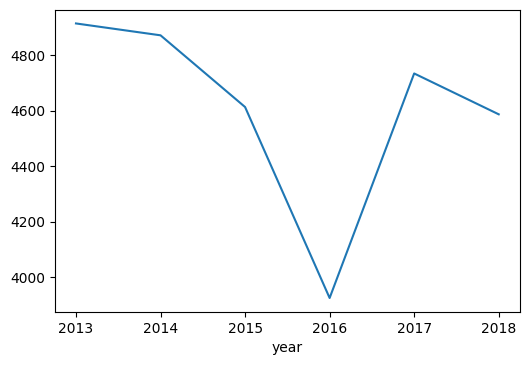

In [35]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

the dip is attributed to a dip in year 2016. WHY?
- possible road construction which cause highway closure?

excluding the dip, you can possibly expect somewhere in the range of 5000 cars per hour during daytime in warm months

### analyse data by day of the week

In [36]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] 

<ipython-input-36-1c824cf974a2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

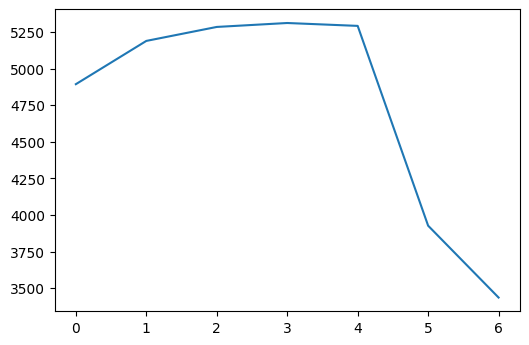

In [37]:
plt.plot(by_dayofweek['traffic_volume'])
#0 is monday and 6 is sunday

heavy traffic on weekdays and roughly a 25% drop in traffic volumes on weekends(day 5&6)

### analyse data by weekday and weekend

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.



In [38]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year,dayofweek
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012,1
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012,1
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012,1
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012,1
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,2018,6
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,2018,6
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,2018,6
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,2018,6


In [39]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-39-4244afafd4b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



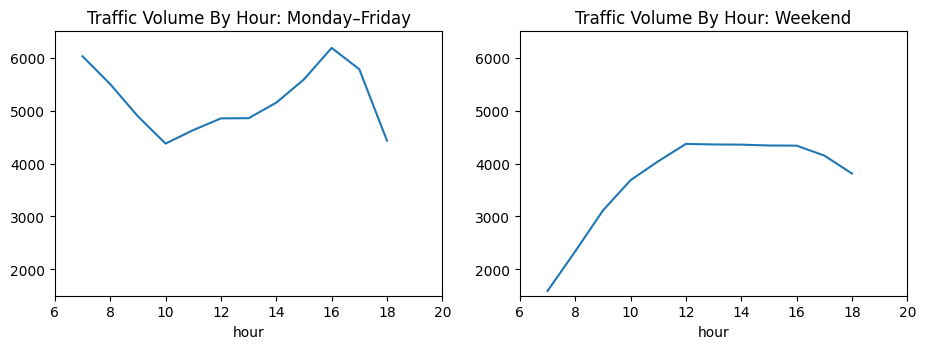

In [40]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

traffic during weekdays are more at every hour compared to weekends
- 7 to 8 : people go to office
- from 2 to 6: go back home?

summary on data compared based on time:
- day time traffic> night time traffic
- warmer months mean more traffic
- weekday traffic > weekend traffic

dataset also includes data about weather, should look more into that to analyse what weather causes more traffic

In [41]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

out of data that explains data about weather(temp,rain_lh,snow_lh,clouds_all), temp has highest correlation, will check more on it even though it has a weak corelation value

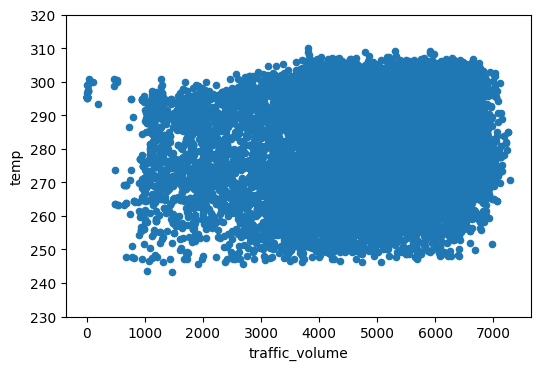

In [43]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

temp and traffic_volume doesnt look that corelated, data is really scattered with no signs of a pattern

Let's now look at weather related columns i.e. weather_main and weather_description 

In [44]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

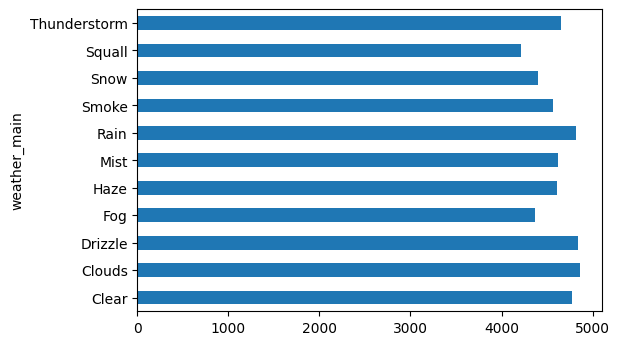

In [63]:
by_weather_main['traffic_volume'].plot.barh()

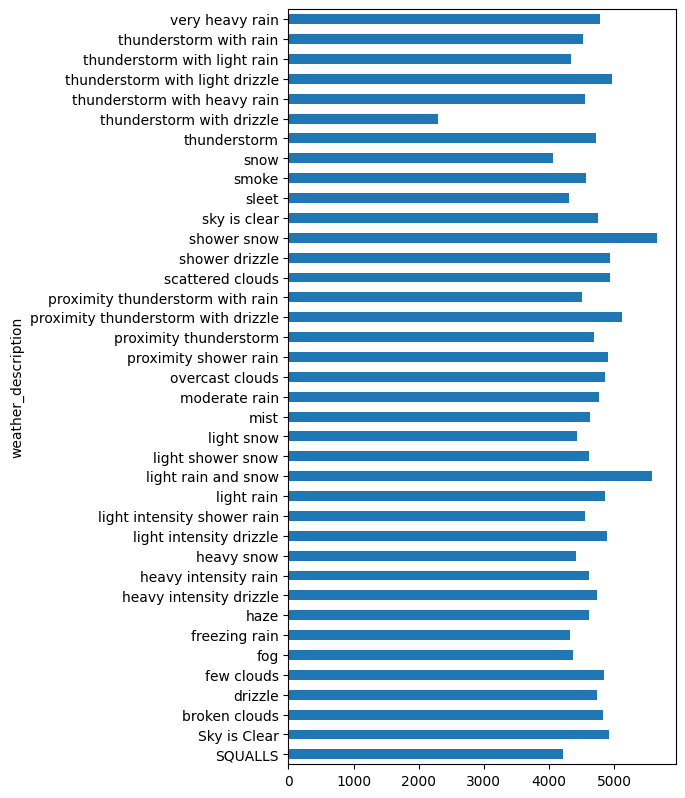

In [62]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))

both columns dont really provide insightful data as it is about similar mean values of each class with one ot two exceptions i.e. thunderstorm with drizzle that cause significant amount of decrease in traffic volumes